# K-Nearest Neighbours

The KNN method is the most famous **non-parametric method**, since do not assume a parametric form of $f(X)$. The advantage of this kind of approach is improved flexibility, but at the expense of reduced interpretability and more difficult inference.

On the contrary, **parametric models** we saw in previous courses are easier to fit, more interpretable and have an easier inference, but they make strong assumption about the form of $f(X)$ and are often less flexible.

Despite being a very simple approach, it could be very effective when we don't know the distribution of the data we are managing.

The choice of K will determine the bias-variance tradeoff, minimizing the error on test set.

**Curse of dimensionality**: Spreading observation over a large number of $p$ dimensions results in observations having no near neighbours, which leads to very poor predictions through KNN. This is the reason why KNN is good for low values of $p$ and large values of $N$.

KNN dominates LDA and Logistic Regression approach when the problem is highly non-linear and the assumption of normality doesn't hold. **QDA** is a compromise between KNN and LDA/LR since it models flexibility but is still parametric. Also, KNN **serves only a prediction purpose** since there is no model to be interpreted, but only previous observation that lead to predictions.

# Laboratory: Comparison of Classification Techniques

In [1]:
library(dplyr)  # optional
library(ISLR)
library(bestglm)
library(MASS)
library(class)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: leaps

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [3]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



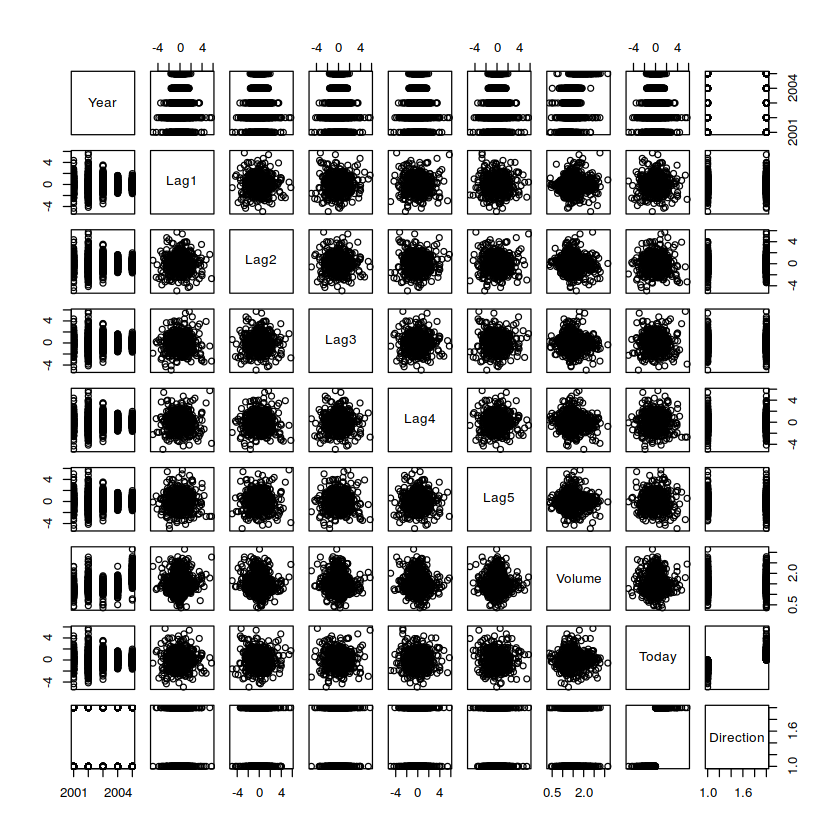

In [6]:
attach(Smarket)
Smarket %>% pairs
# Direction is a derived variable
# There is a small relation between Year and Volume

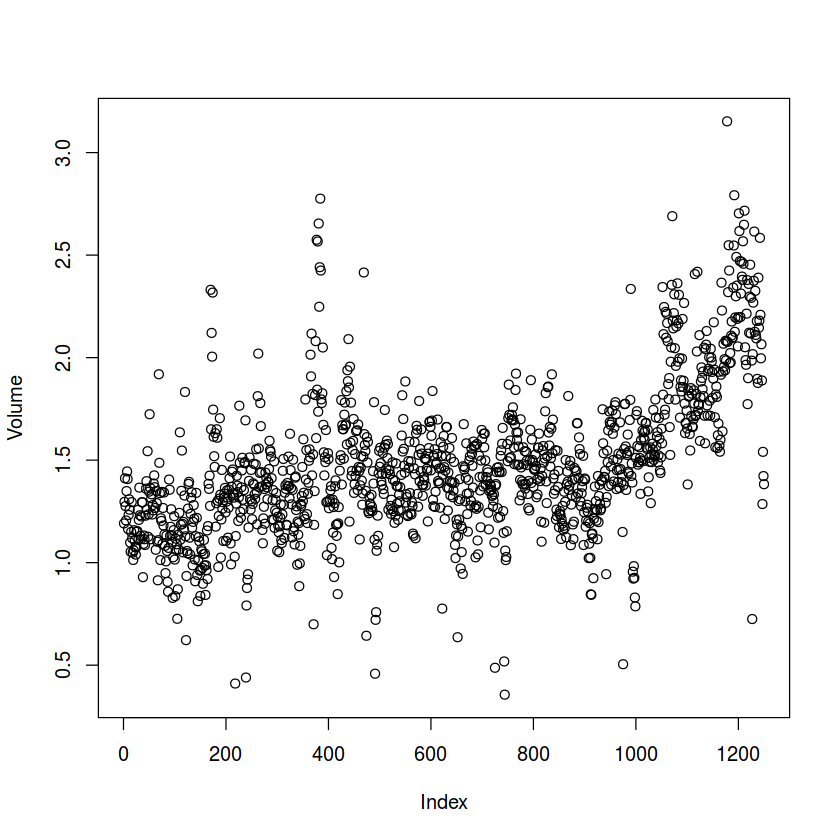

In [7]:
plot(Volume)

In [9]:
# Since the only p-value which is not tragic is the one of yesterday (Lag1)
# we can suppose that if yesterday results were negative, today results will
# probably be negative, too.
glm_fit <- glm(Direction ~ . - Today - Year, data = Smarket, family = "binomial")
summary(glm_fit)


Call:
glm(formula = Direction ~ . - Today - Year, family = "binomial", 
    data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [10]:
glm_probs <- predict(glm_fit, type = "response")

In [13]:
glm_probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [34]:
# Use contrast to see how the factor has been converted in number
contrasts(Smarket$Direction)

,Up
Down,0
Up,1


In [21]:
glm_pred <- ifelse(glm_probs > 0.5, "Up", "Down")

In [22]:
# Confusion matrix
table(glm_pred, Smarket$Direction)

        
glm_pred Down  Up
    Down  145 141
    Up    457 507

In [23]:
# Training error rate
mean(glm_pred != Smarket$Direction)

[1] 0.4784

In [35]:
train <- Smarket$Year < 2005
glm_fit_0104 <- glm(Direction ~ . - Today - Year, data = Smarket, family = binomial, subset = train)
glm_probs_05 <- predict(glm_fit_0104, Smarket[!train, ], type = "response")
glm_pred_05 <- ifelse(glm_probs_05 > 0.5, "Up", "Down")
table(glm_pred_05, Smarket$Direction[!train])

           
glm_pred_05 Down Up
       Down   77 97
       Up     34 44

In [36]:
mean(glm_pred_05 != Smarket$Direction[!train])

[1] 0.5198413

In [50]:
Smarket2 <- Smarket[,-c(1,8)]

In [53]:
head(Smarket2)

Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0.381,-0.192,-2.624,-1.055,5.010,1.1913,Up
0.959,0.381,-0.192,-2.624,-1.055,1.2965,Up
1.032,0.959,0.381,-0.192,-2.624,1.4112,Down
-0.623,1.032,0.959,0.381,-0.192,1.2760,Up
0.614,-0.623,1.032,0.959,0.381,1.2057,Up
0.213,0.614,-0.623,1.032,0.959,1.3491,Up


In [54]:
best <- bestglm(Smarket2, family= binomial)

Morgan-Tatar search since family is non-gaussian.


In [55]:
best$BestModels

Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Criterion
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1731.175
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,1736.327
FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,1737.580
FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,1737.647
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,1738.259


In [65]:
glm_fit_2 <- glm(Direction ~ Lag1 + Lag2, data = Smarket, family = binomial, subset = train)
glm_probs2  <- predict(glm_fit_2, Smarket[!train, ], type = "response")
glm_pred2  <- ifelse(glm_probs2 > 0.5, "Up", "Down")

In [66]:
table(glm_pred2, Smarket$Direction[!train])

         
glm_pred2 Down  Up
     Down   35  35
     Up     76 106

# KNN

In [67]:
train_X <- cbind(Lag1, Lag2)[train, ]
test_X <- cbind(Lag1, Lag2)[!train, ]
train_Direction <- Direction[train]

In [68]:
set.seed(2)

In [69]:
knn_pred <- knn(train_X, test_X, train_Direction, k = 1)
table(knn_pred, Direction[!train])

        
knn_pred Down Up
    Down   43 58
    Up     68 83

In [70]:
mean(knn_pred != Direction[!train])

[1] 0.5